# DSCI 508 - Final Project 

## Model to predict whether memebers of a union will stay or leave the union. 

**Author: Jake Holden**

### Purpose: 
The purpose of this document is to build a model that will predict wheter a person will remain in a hypothetical trade union, the United Data Scientists Union (UDSU).
To briefly sum up the order of operations. 
We will load a data set, clean and normalize the data, find outliers, perform Principal Component Analysis (PCA), look for corrrelations, conduct logistic regression and Support Vector Machine (SVM), perform feature selection by elmination with Decision Tree and a Random Forest. 
We will then look at the training and validation accuracy of the model. 
Finally, we will predict whether the members of the UDSU will stay or leave the union. 

## A. Import Necessary Packages

Below we will import the necessary packages and features to build this model.

In [1]:
# Packages and features.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


## B. Import the Data Set

In this section we will import the data set required to complete the task.

In [2]:
# Load the dataset from the GitHub URL I created.
url = "https://raw.githubusercontent.com/JacobDHolden/ML-Model-Trade-Union/39997ce6dc8347a2ef362a08f004402250147dca/Jake_train.csv"
data = pd.read_csv(url)

# Dropping the ID as the column and data is unecessary
data.drop('ID',axis=1,inplace=True)

Let us look at the data and ensure the ID column was dropped from the data set. 

In [3]:
data.head(5)

gender  Management USAcitizen Married  MonthsInUnion ContinuingEd FeatureA  \
0  Female           0        Yes     Yes             64          Yes       No   
1    Male           0         No      No             50          Yes       No   
2  Female           0        Yes      No             47          Yes      Yes   
3    Male           0         No      No              1          Yes       No   
4    Male           0        Yes     Yes             50          Yes      Yes   

  Connectivity   FeatureC   FeatureD   FeatureE   FeatureF   FeatureG  \
0          DSL        Yes         No         No        Yes        Yes   
1  Fiber optic        Yes        Yes         No        Yes         No   
2    onlyViaER  Maryville  Maryville  Maryville  Maryville  Maryville   
3          DSL         No         No         No         No         No   
4  Fiber optic        Yes        Yes        Yes         No        Yes   

    FeatureB   DuesFrequency PaperlessBilling            PaymentMethod  \
0         No        One year               No             Mailed check   
1        Yes  Month-to-month              Yes  Credit card (automatic)   
2  Maryville        One year               No         Electronic check   
3         No  Month-to-month               No         Electronic check   
4        Yes        One year              Yes         Electronic check   

   MonthlyDues  TotalDues LeftUnion  
0           66       4068        No  
1           94       4748        No  
2           27       1251        No  
3           46         46       Yes  
4          108       5431        No

## C. Clean the Data

Now it is time to clean the data, look for missing values, view the feature types, look for outliers, and convert data into numeric values while also standardizing data.

### C.1 - Look for Missing Values

In [4]:
# First we will look for missing values

data.isna().sum()/data.shape[0]

gender              0.0
Management          0.0
USAcitizen          0.0
Married             0.0
MonthsInUnion       0.0
ContinuingEd        0.0
FeatureA            0.0
Connectivity        0.0
FeatureC            0.0
FeatureD            0.0
FeatureE            0.0
FeatureF            0.0
FeatureG            0.0
FeatureB            0.0
DuesFrequency       0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyDues         0.0
TotalDues           0.0
LeftUnion           0.0
dtype: float64

From the cell above we can see that the data is not missing any values.
Let us look at the feature types.


### C.2 - Feature Types

In [5]:
# Displaying the feature types.

data.dtypes

gender              object
Management           int64
USAcitizen          object
Married             object
MonthsInUnion        int64
ContinuingEd        object
FeatureA            object
Connectivity        object
FeatureC            object
FeatureD            object
FeatureE            object
FeatureF            object
FeatureG            object
FeatureB            object
DuesFrequency       object
PaperlessBilling    object
PaymentMethod       object
MonthlyDues          int64
TotalDues            int64
LeftUnion           object
dtype: object

I notice that the TotalDues is an integer type but should be a float type. Below we will change TotalDues to a float type. 
We will also replace NaN values with the median value.

In [6]:
# Convert TotalDues to float type.

data['TotalDues'] = pd.to_numeric(data['TotalDues'], errors='coerce')
fillna_value = np.nanmedian(data['TotalDues'])
data['TotalDues'].fillna(fillna_value, inplace=True)

In [7]:
# We are going to ensure that TotalDues was changed to a float type.

data.dtypes

gender              object
Management           int64
USAcitizen          object
Married             object
MonthsInUnion        int64
ContinuingEd        object
FeatureA            object
Connectivity        object
FeatureC            object
FeatureD            object
FeatureE            object
FeatureF            object
FeatureG            object
FeatureB            object
DuesFrequency       object
PaperlessBilling    object
PaymentMethod       object
MonthlyDues          int64
TotalDues            int64
LeftUnion           object
dtype: object

### C.3 - Looking for Outliers

In [8]:
# Now we will look for outliers.
# Let us also look at the continuous variables ("MonthsInUnion","MonthlyDues").
data.drop("Management",axis=1).describe()

MonthsInUnion  MonthlyDues    TotalDues
count     1000.00000   1000.00000  1000.000000
mean        34.76200     88.42400  2262.951000
std         41.65074    633.51564  2253.952628
min          1.00000     19.00000    19.000000
25%          9.75000     26.00000   418.000000
50%         30.00000     69.00000  1415.500000
75%         56.00000     89.00000  3634.500000
max        699.00000  19437.00000  8685.000000

The 3rd quartiles of MonthlyDues and MonthsInUnion are smaller than the maximum values. 
This might suggest the existence of outliers. 
Let's do a boxplot to check.

<Axes: >

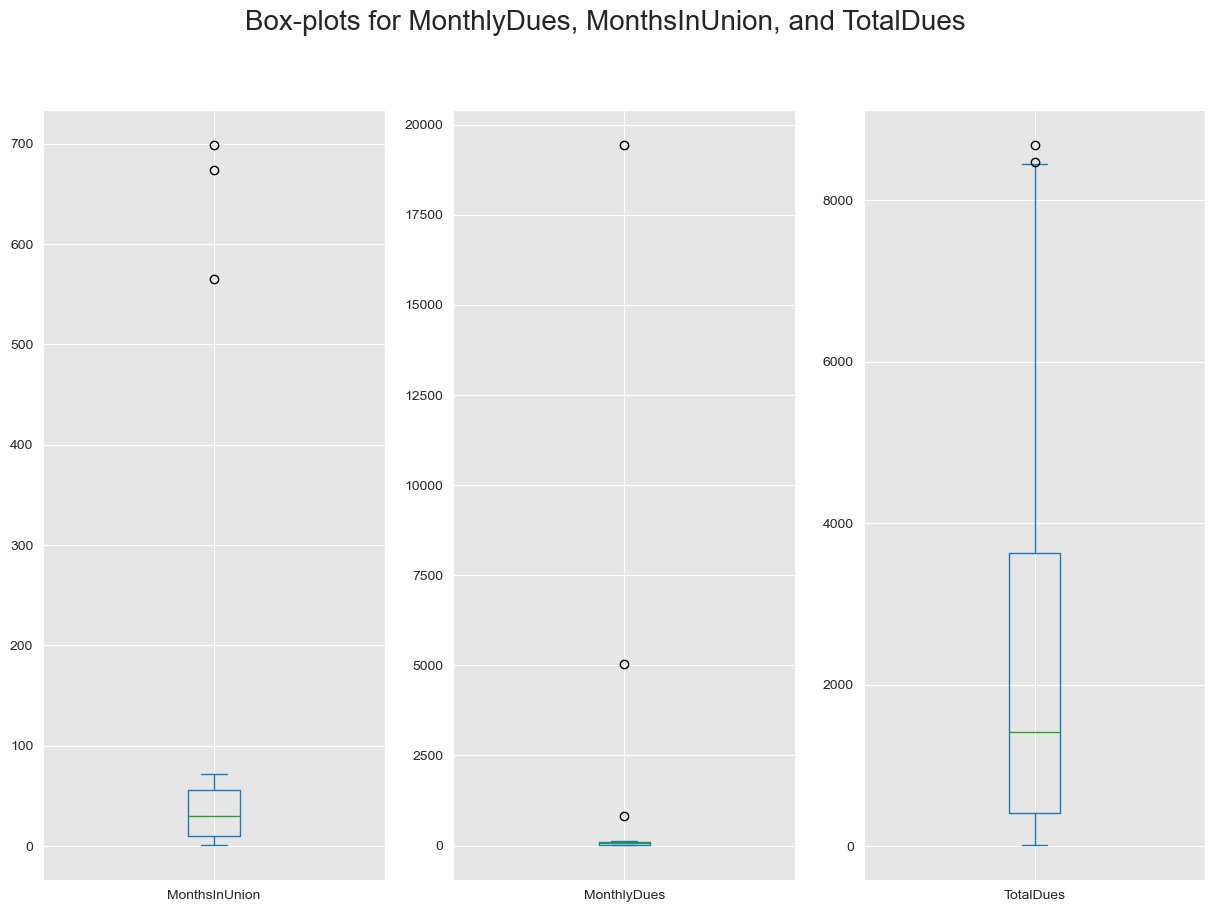

In [9]:
# Code for building, creating, and displaying a box-plot.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
fig.suptitle("Box-plots for MonthlyDues, MonthsInUnion, and TotalDues", fontsize=20)

data.MonthsInUnion.plot.box(grid=True, ax=axes[0])
data.MonthlyDues.plot.box(grid=True, ax=axes[1])
data.TotalDues.plot.box(grid=True, ax=axes[2])

We can see there are in fact outliers. Below the outliers will be removed. 

In [10]:
# Remove the outliers.

data = data[(data["MonthsInUnion"] < 100) & 
            (data["MonthlyDues"] < 1900) & 
            (data["TotalDues"] < 9000)]

### C.4 - Conversion to numeric and standardization
We will use the function LabelEncoder to perform encoding for binary variables, get_dummies for categorical variables, and StandardScaler to standardize the float variables.

In [11]:
binary_variables=[]  # Initialize an empty list to store binary variable names
for col in data.columns:  # Iterate through each column in the dataset
    if data[col].nunique()==2:  # Check if the number of unique values in the column is 2
        binary_variables.append(col)  # If the column has 2 unique values, it's considered a binary variable, so add its name to the list
continuous_variables=['MonthsInUnion','MonthlyDues','TotalDues']  # Create a list of continuous variable names

In [12]:
standard_scalers = []  # Initialize an empty list to store StandardScaler objects for continuous variables
for col in continuous_variables:  # Iterate through each continuous variable
    scaler = StandardScaler()  # Create a StandardScaler object
    data_col = np.array(data[col]).reshape(-1, 1)  # Extract the column data and reshape it into a 2D array
    scaler.fit(data_col)  # Fit the StandardScaler to the column data
    data[col] = scaler.transform(data_col)  # Transform the column data using the scaler and update the data frame
    standard_scalers.append(scaler)  # Add the fitted scaler to the list

encoders=[]  # Initialize an empty list to store LabelEncoder objects for binary variables
for col in binary_variables:  # Iterate through each binary variable
    enc=LabelEncoder()  # Create a LabelEncoder object
    enc.fit(data[col])  # Fit the LabelEncoder to the column data
    data[col]=enc.transform(data[col])  # Transform the column data using the encoder and update the data frame
    encoders.append(enc)  # Add the fitted encoder to the list

data= pd.get_dummies(data)  # Convert categorical variables into dummy/indicator variables

Now, let's look at the data after the cleaning process.

In [13]:
data.head(5)

gender  Management  USAcitizen  Married  MonthsInUnion  ContinuingEd  \
0       0           0           1        1       1.268206             1   
1       1           0           0        0       0.696891             1   
2       0           0           1        0       0.574467             1   
3       1           0           0        0      -1.302711             1   
4       1           0           1        1       0.696891             1   

   PaperlessBilling  MonthlyDues  TotalDues  LeftUnion  ...  \
0                 0     0.087740   0.802512          0  ...   
1                 1     1.005783   1.104560          0  ...   
2                 0    -1.190963  -0.448765          0  ...   
3                 0    -0.568005  -0.984012          1  ...   
4                 1     1.464804   1.407941          0  ...   

   FeatureB_Maryville  FeatureB_No  FeatureB_Yes  \
0                   0            1             0   
1                   0            0             1   
2                   1            0             0   
3                   0            1             0   
4                   0            0             1   

   DuesFrequency_Month-to-month  DuesFrequency_One year  \
0                             0                       1   
1                             1                       0   
2                             0                       1   
3                             1                       0   
4                             0                       1   

   DuesFrequency_Two year  PaymentMethod_Bank transfer (automatic)  \
0                       0                                        0   
1                       0                                        0   
2                       0                                        0   
3                       0                                        0   
4                       0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               0   
1                                      1                               0   
2                                      0                               1   
3                                      0                               1   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           1  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 42 columns]

## D. Perform PCA and Look for Correlations
In this section, we will plot scatter plots for continuous variables. Then we will compute the correlation between features and the target. Then we will apply PCA and visualize the scree plot.

### D.1 - Visualize Scatter Plots to look for patterns.

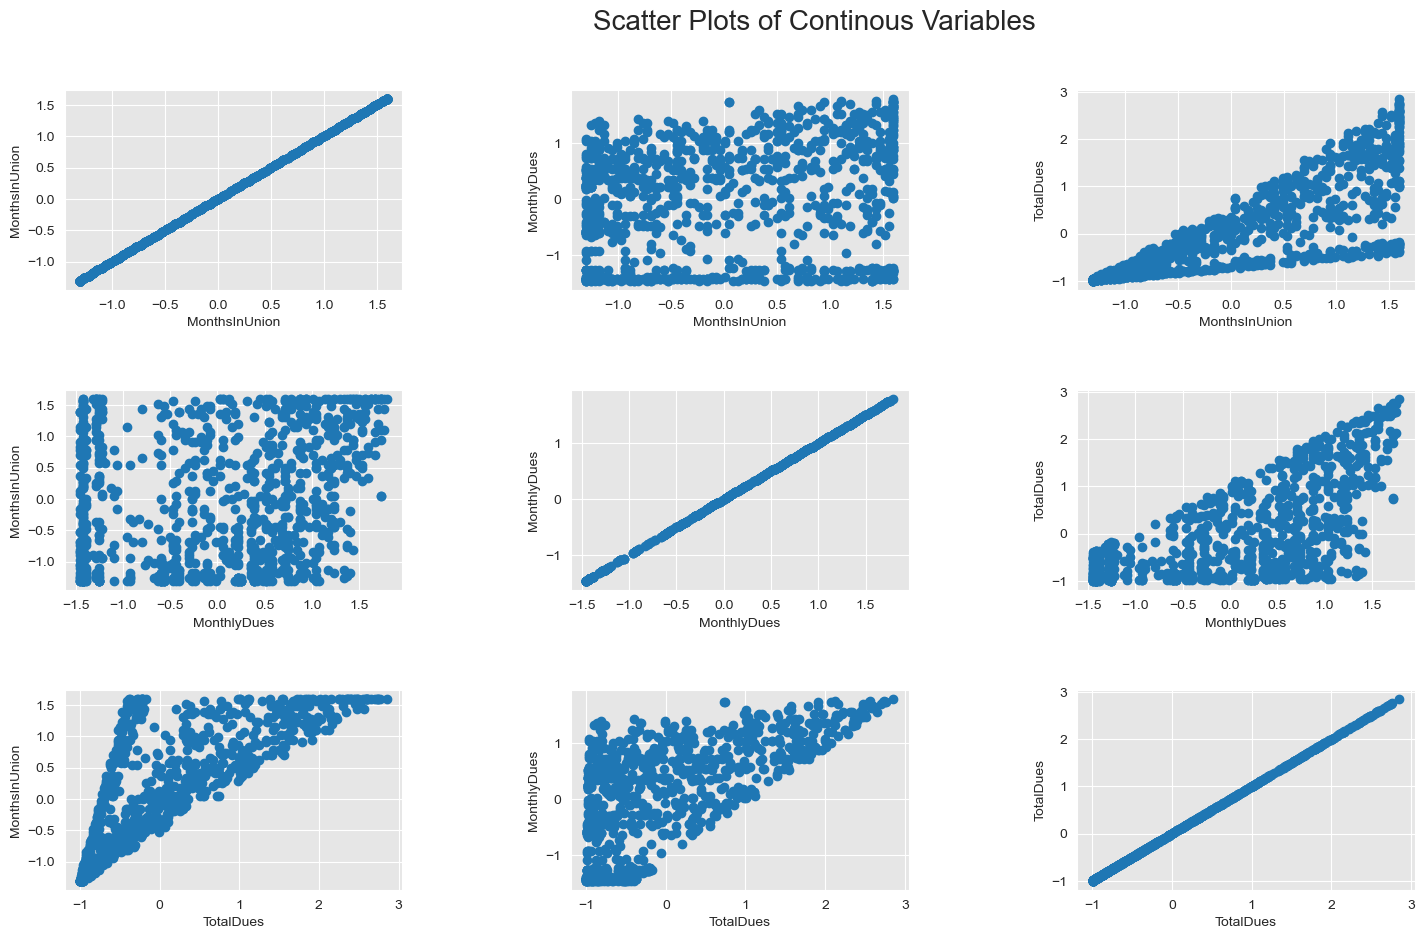

In [14]:
#Scatter plots of continuous variables 

fig, ax = plt.subplots(figsize=(20,10),nrows=3,ncols=3)
title='Scatter Plots of Continous Variables'
fig.suptitle(title, fontsize=20)
columns='MonthsInUnion','MonthlyDues','TotalDues' 
for j in range(len(columns)):
    for k in range(len(columns)):
        ax[j,k].scatter(x=data[columns[j]],y=data[columns[k]])
        ax[j,k].set_xlabel(columns[j])
        ax[j,k].set_ylabel(columns[k])

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=0.5, wspace=0.5)
plt.show()

I am not identifying any patterns among these three variables.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:

sns.pairplot(data,hue='TotalDues',palette='Dark2')

### D.2 -  Correlation between predictors and Y

In [15]:
from scipy.stats import pearsonr  # Import the Pearson correlation coefficient function

def corr_and_pval(data):
    # Initialize matrices to store correlation coefficients and p-values
    coeffmat = np.zeros((data.shape[1], data.shape[1]))
    pvalmat = np.zeros((data.shape[1], data.shape[1]))

    # Loop through each pair of columns in the data
    for i in range(data.shape[1]):    
        for j in range(data.shape[1]):
            # Calculate Pearson correlation coefficient and p-value for the pair of columns
            corrtest = pearsonr(data[data.columns[i]], data[data.columns[j]])

            # Store correlation coefficient and p-value in respective matrices
            coeffmat[i,j] = corrtest[0]
            pvalmat[i,j] = corrtest[1]
    return coeffmat, pvalmat  # Return matrices of correlation coefficients and p-values

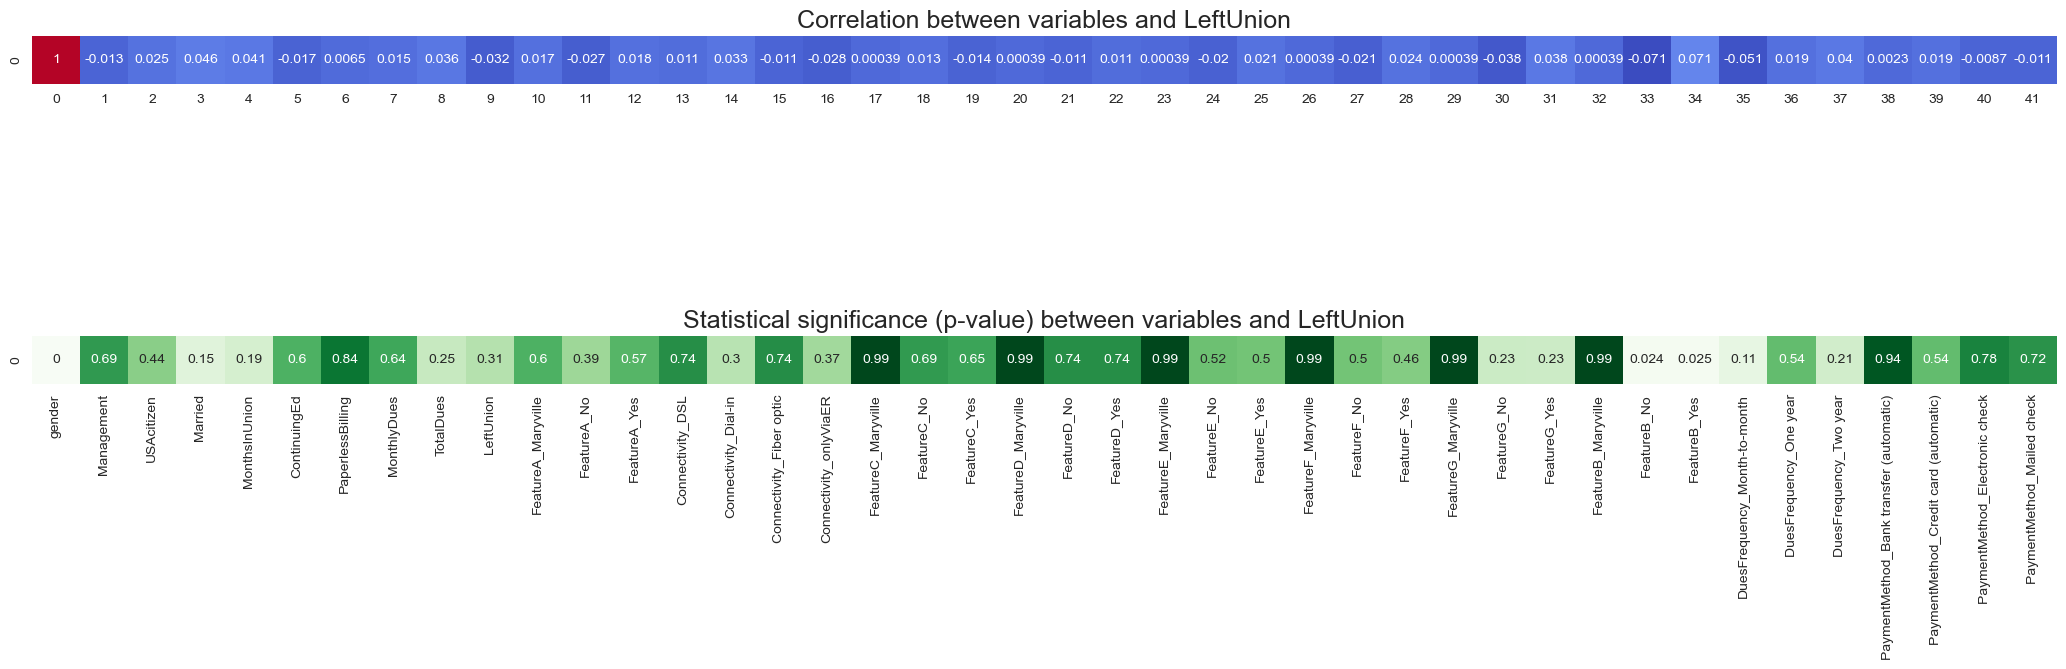

In [16]:
# Create a figure with two subplots arranged vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 5))

# Define titles for the subplots
title = "Correlation between variables and LeftUnion"
title2 = "Statistical significance (p-value) between variables and LeftUnion"

# Create subplots for the heatmap of correlation
sns.heatmap(np.transpose(corr_and_pval(data)[0][0].reshape(corr_and_pval(data)[0][:,0].shape[0],1)), vmax=1, square=True, annot=True, cmap='coolwarm', cbar=False, ax=ax1)
ax1.set_title(title, fontdict={'fontsize': 18})  # Set title for the first subplot

# Create subplots for the heatmap of statistical significance
sns.heatmap(np.transpose(corr_and_pval(data)[1][0].reshape(corr_and_pval(data)[1][:,0].shape[0],1)), xticklabels=data.columns, vmax=1, square=True, annot=True, cmap="Greens", cbar=False, ax=ax2)
ax2.set_title(title2, fontdict={'fontsize': 18})  # Set title for the second subplot

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=2, wspace=0.5)

From the Pearson correlation matrix, 
we can see that there not a single variable that is highly correlated with the target. 
Later on, we will perform Recursive Feature Elimination with the modeling section.

### D.3 - PCA

In [17]:
from sklearn.decomposition import PCA  # Import PCA (Principal Component Analysis) from sklearn

num_pc = data.shape[1] - 1  # Number of principal components equals the number of columns in the data minus 1 (excluding the target variable)
pca = PCA(n_components=num_pc)  # Initialize PCA with the specified number of principal components
pca.fit(data.drop('LeftUnion', axis=1))  # Fit PCA to the data, excluding the 'LeftUnion' column
eigenvalues = pca.explained_variance_  # Get the explained variance of each principal component
pca_components = pca.components_  # Get the principal components

print(pca_components)

[[ 8.94654777e-03  3.76307746e-02  6.87050465e-02 ...  3.08235763e-02
   4.19434958e-02 -1.04937932e-01]
 [ 1.46645017e-02 -4.60498700e-02  1.29689431e-01 ...  7.20826927e-02
  -1.38138073e-01  1.60520533e-02]
 [-6.20247573e-03 -5.62042908e-02  5.64591629e-02 ...  3.54175120e-02
  -1.46182807e-01  3.62525138e-02]
 ...
 [-0.00000000e+00  8.00451307e-18  5.77674811e-18 ...  3.50141864e-03
   3.50141864e-03  3.50141864e-03]
 [-0.00000000e+00  2.93820485e-17  1.23275599e-17 ...  4.41291207e-17
   4.82059589e-17  4.08398298e-17]
 [ 0.00000000e+00 -2.40489877e-16  9.55968473e-17 ...  2.18911115e-04
   2.18911115e-04  2.18911115e-04]]


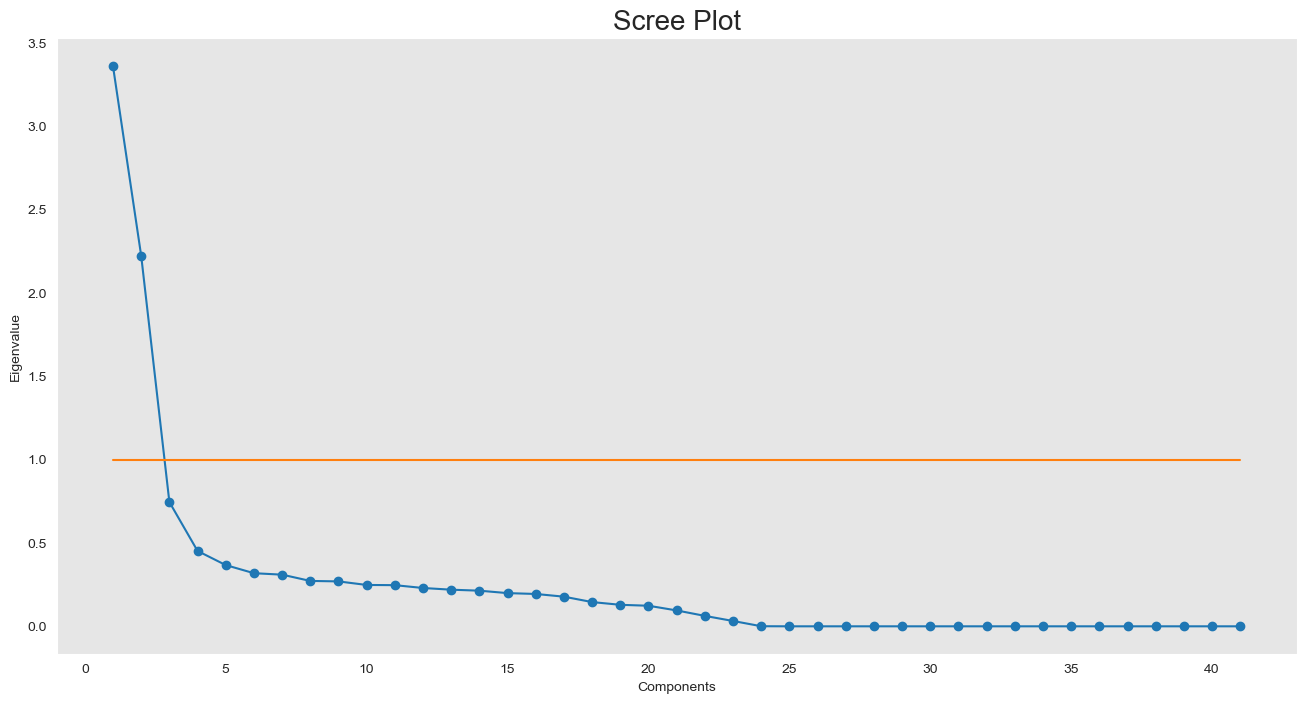

In [18]:
# Below we will display a Scree Plot

plt.figure(figsize=(16,8))
plt.scatter(range(1,data.shape[1]),eigenvalues)
plt.plot(range(1,data.shape[1]),eigenvalues)
plt.plot(range(1,data.shape[1]),eigenvalues/eigenvalues) #the 1 eigenvalue line
plt.title('Scree Plot',fontsize=20)
plt.xlabel('Components')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## E. Methods
In this section, we'll apply Recursive Feature Elimination (RFE) with Logistic Regression. Then, we'll utilize the optimal features obtained from RFE with both Logistic Regression and Support Vector Machines (SVM). Similarly, we'll repeat the process with Decision Trees and Random Forests.

In [19]:
X=data.drop('LeftUnion',axis=1)
y=data['LeftUnion']

### E.1 -  Logistic Regression
Feature Selection by Elimination with Logistic Regression

In [20]:
# Initialize an empty list to store mean cross-validation scores
scores_arr = []

# Loop through different numbers of features to select
for to_select in range(10, 41):
    # Initialize Logistic Regression classifier
    clf = LogisticRegression(random_state=0, max_iter=1000)
    
    # Initialize Recursive Feature Elimination (RFE) selector with the current number of features to select
    selector = RFE(clf, n_features_to_select=to_select)
    
    # Fit RFE selector to the data
    selector.fit(X, y)
    
    # Get the ranking of features
    ranking = selector.ranking_
    
    # Get the indices of the best features selected by RFE
    best_features = np.where(ranking == 1)
    
    # Initialize Logistic Regression classifier
    clf = LogisticRegression(random_state=0, max_iter=1000)
    
    # Perform cross-validation on the selected features and compute mean score
    scores = cross_val_score(clf, X.iloc[:, best_features[0]], y, cv=10)
    
    # Append the mean score to the scores_arr list
    scores_arr.append(np.mean(scores))

# Initialize Logistic Regression classifier
clf = LogisticRegression(random_state=0, max_iter=1000)

# Determine the optimal number of features based on the maximum score
optimal_n_features = np.argmax(scores_arr) + 10

# Initialize RFE selector with the optimal number of features
selector = RFE(clf, n_features_to_select=optimal_n_features)

# Fit RFE selector to the data
selector.fit(X, y)

# Get the ranking of features
ranking = selector.ranking_

# Get the indices of the best features selected by RFE
best_features = np.where(ranking == 1)[0]

# Print the selected features
print('Considering {} features only.'.format(len(best_features)))
print(X.columns[best_features])

# Initialize Logistic Regression classifier
clf = LogisticRegression(random_state=0, max_iter=1000)

# Compute the mean cross-validation score using the selected features
np.mean(cross_val_score(clf, X.iloc[:, best_features], y, cv=10))

Considering 10 features only.
Index(['MonthsInUnion', 'PaperlessBilling', 'TotalDues', 'FeatureA_Maryville',
       'Connectivity_Dial-in', 'Connectivity_Fiber optic', 'FeatureC_No',
       'DuesFrequency_Month-to-month', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check'],
      dtype='object')


0.8144343434343435

In [21]:
#Train test split for the new data (with extracted features)

# train test split & holdout set
X_train, X_hold, y_train, y_hold = train_test_split(X.iloc[:,best_features], y, test_size=0.2, 
                                                    random_state=1)

# train test split & test set
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=0.5, 
                                                    random_state=1)
print(f'Training Features Shape:   {X_train.shape}')
print(f'Validation Features Shape: {X_valid.shape}')
print(f'Test Features Shape:       {X_test.shape}')

Training Features Shape:   (797, 10)
Validation Features Shape: (100, 10)
Test Features Shape:       (100, 10)


In [22]:
# Initialize Logistic Regression classifier
clf = LogisticRegression(random_state=0, max_iter=1000)

# Fit the Logistic Regression model on the selected features
lr_mod = clf.fit(X.iloc[:, best_features], y)

# Print the training accuracy of the Logistic Regression model
print(f'Training Accuracy: {lr_mod.score(X_train, y_train).round(4)}')

# Print the testing accuracy of the Logistic Regression model
print(f'Testing Accuracy:  {lr_mod.score(X_test, y_test).round(4)}')

Training Accuracy: 0.8118
Testing Accuracy:  0.84


### E.2 - SVM
We'll explore a range of degree values to determine the most suitable degree for the polynomial SVM classifier through iterative testing.

In [23]:
# Initialize empty lists to store training and validation accuracies
svc_train_acc = []
svc_valid_acc = []

# Define a range of degrees for the polynomial kernel
c_range = [2, 3, 4, 5]

# Iterate over each degree in the range
for c in c_range:
    # Initialize Support Vector Classifier with polynomial kernel and current degree
    temp_svc = SVC(kernel='poly', degree=c, random_state=1)
    
    # Fit the model to the training data
    temp_svc.fit(X_train, y_train)
    
    # Compute and store the training accuracy
    svc_train_acc.append(temp_svc.score(X_train, y_train))
    
    # Compute and store the validation accuracy
    svc_valid_acc.append(temp_svc.score(X_valid, y_valid))

# Find the index of the maximum validation accuracy
svc_idx = np.argmax(svc_valid_acc)

# Determine the optimal degree based on the maximum validation accuracy
svc_opt_depth = c_range[svc_idx]

# Get the training accuracy for the optimal model
svc_opt_train_acc = svc_train_acc[svc_idx]

# Get the validation accuracy for the optimal model
svc_opt_valid_acc = svc_valid_acc[svc_idx]

# Print the results
print(f'Optimal value for degree:\t\t{svc_opt_depth}')
print(f'Training Accuracy for Optimal Model:    {svc_opt_train_acc.round(4)}')
print(f'Validation Accuracy for Optimal Model:  {svc_opt_valid_acc.round(4)}')

Optimal value for degree:		5
Training Accuracy for Optimal Model:    0.8218
Validation Accuracy for Optimal Model:  0.83


In [24]:
# Initialize Support Vector Classifier with polynomial kernel and degree from previous tuning
svc0 = SVC(kernel='poly', degree=c, random_state=1)

# Fit the SVM model on the selected features
svc = svc0.fit(X.iloc[:, best_features], y)

# Print the training accuracy of the SVM model
print(f'Training Accuracy: {svc.score(X_train, y_train).round(4)}')

# Print the testing accuracy of the SVM model
print(f'Testing Accuracy:  {svc.score(X_test, y_test).round(4)}')


Training Accuracy: 0.8193
Testing Accuracy:  0.84


### E.3 - Decision Tree
Now let us go ahead and perform the necessary codes to produce a decision tree and evaluate the results. 

In [25]:
# Initialize an empty list to store mean cross-validation scores
scores_arr = []

# Loop through different numbers of features to select
for to_select in range(10, 41):
    # Initialize Decision Tree classifier
    clf1 = DecisionTreeClassifier(max_depth=None, random_state=1)
    
    # Initialize Recursive Feature Elimination (RFE) selector with the current number of features to select
    selector = RFE(clf1, n_features_to_select=to_select)
    
    # Fit RFE selector to the data
    selector.fit(X, y)
    
    # Get the ranking of features
    ranking = selector.ranking_
    
    # Get the indices of the best features selected by RFE
    best_features = np.where(ranking == 1)
    
    # Initialize Decision Tree classifier
    clf1 = DecisionTreeClassifier(max_depth=None, random_state=1)
    
    # Perform cross-validation on the selected features and compute mean score
    scores = cross_val_score(clf1, X.iloc[:, best_features[0]], y, cv=10)
    
    # Append the mean score to the scores_arr list
    scores_arr.append(np.mean(scores))

# Initialize Decision Tree classifier
clf1 = DecisionTreeClassifier(max_depth=None, random_state=1)

# Determine the optimal number of features based on the maximum score
optimal_n_features = np.argmax(scores_arr) + 10

# Initialize RFE selector with the optimal number of features
selector = RFE(clf1, n_features_to_select=optimal_n_features)

# Fit RFE selector to the data
selector.fit(X, y)

# Get the ranking of features
ranking = selector.ranking_

# Get the indices of the best features selected by RFE
best_features = np.where(ranking == 1)[0]

# Print the selected features
print('Considering {} features only.'.format(len(best_features)))
print(X.columns[best_features])

# Initialize Decision Tree classifier
clf1 = DecisionTreeClassifier(max_depth=None, random_state=1)

# Compute the mean cross-validation score using the selected features
np.mean(cross_val_score(clf1, X.iloc[:, best_features], y, cv=10))

Considering 10 features only.
Index(['Management', 'Married', 'MonthsInUnion', 'MonthlyDues', 'TotalDues',
       'Connectivity_Fiber optic', 'FeatureC_No', 'FeatureG_Yes',
       'DuesFrequency_Month-to-month', 'PaymentMethod_Electronic check'],
      dtype='object')


0.7511616161616161

In [26]:
# Train test split for the new data (with extracted features)

# train test split & holdout set
X_train, X_hold, y_train, y_hold = train_test_split(X.iloc[:,best_features], y, test_size=0.2, 
                                                    random_state=1)

# train test split & test set
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=0.5, 
                                                    random_state=1)
print(f'Training Features Shape:   {X_train.shape}')
print(f'Validation Features Shape: {X_valid.shape}')
print(f'Test Features Shape:       {X_test.shape}')

Training Features Shape:   (797, 10)
Validation Features Shape: (100, 10)
Test Features Shape:       (100, 10)


In [27]:
# Initialize empty lists to store training and validation accuracies
dt_train_acc = []
dt_valid_acc = []

# Define a range of max_depth values
depth_range = range(10, 41)

# Iterate over each max_depth value
for d in depth_range:
    # Initialize Decision Tree classifier with current max_depth value
    temp_tree = DecisionTreeClassifier(max_depth=d, random_state=1)
    
    # Fit the model to the training data
    temp_tree.fit(X_train, y_train)
    
    # Compute and store the training accuracy
    dt_train_acc.append(temp_tree.score(X_train, y_train))
    
    # Compute and store the validation accuracy
    dt_valid_acc.append(temp_tree.score(X_valid, y_valid))

# Find the index of the maximum validation accuracy
dt_idx = np.argmax(dt_valid_acc)

# Determine the optimal max_depth based on the maximum validation accuracy
dt_opt_depth = depth_range[dt_idx]

# Get the training accuracy for the optimal model
dt_opt_train_acc = dt_train_acc[dt_idx]

# Get the validation accuracy for the optimal model
dt_opt_val_acc = dt_valid_acc[dt_idx]

# Print the results
print(f'Optimal value for max_depth:           {dt_opt_depth}')
print(f'Training Accuracy for Optimal Model:   {dt_opt_train_acc.round(4)}')
print(f'Validation Accuracy for Optimal Model: {dt_opt_val_acc.round(4)}')

Optimal value for max_depth:           10
Training Accuracy for Optimal Model:   0.9448
Validation Accuracy for Optimal Model: 0.81


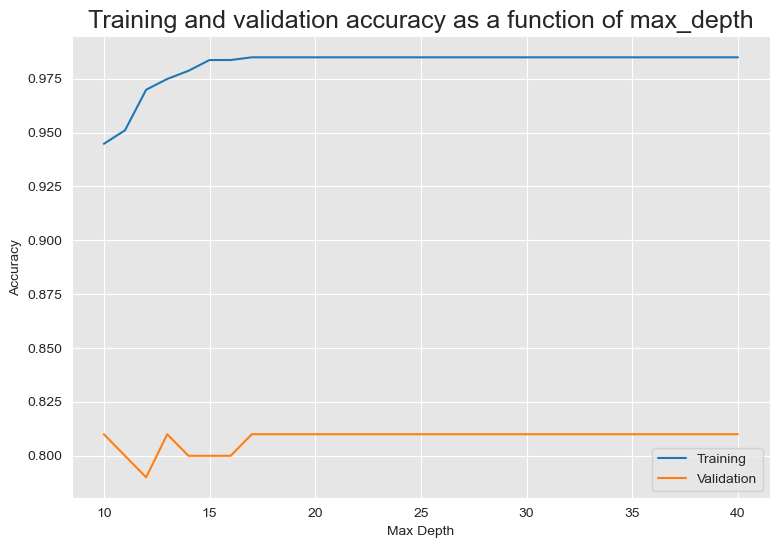

In [28]:
# Training and validation accuracy as a function of max_depth

plt.figure(figsize=([9,6]))
plt.title("Training and validation accuracy as a function of max_depth",fontsize=18)
plt.plot(depth_range, dt_train_acc, label='Training')
plt.plot(depth_range, dt_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
# Best Decision Tree Model

# evaluate decision tree model
dt0 = DecisionTreeClassifier(max_depth=13, random_state=1)
dt = dt0.fit(X_train, y_train)

print(f'Training Accuracy for Final Model:   {dt.score(X_train, y_train).round(4)}')
print(f'Validation Accuracy for Final Model: {dt.score(X_valid, y_valid).round(4)}')
print(f'Testing Accuracy for Final Model:    {dt.score(X_test, y_test).round(4)}')

Training Accuracy for Final Model:   0.9749
Validation Accuracy for Final Model: 0.81
Testing Accuracy for Final Model:    0.76


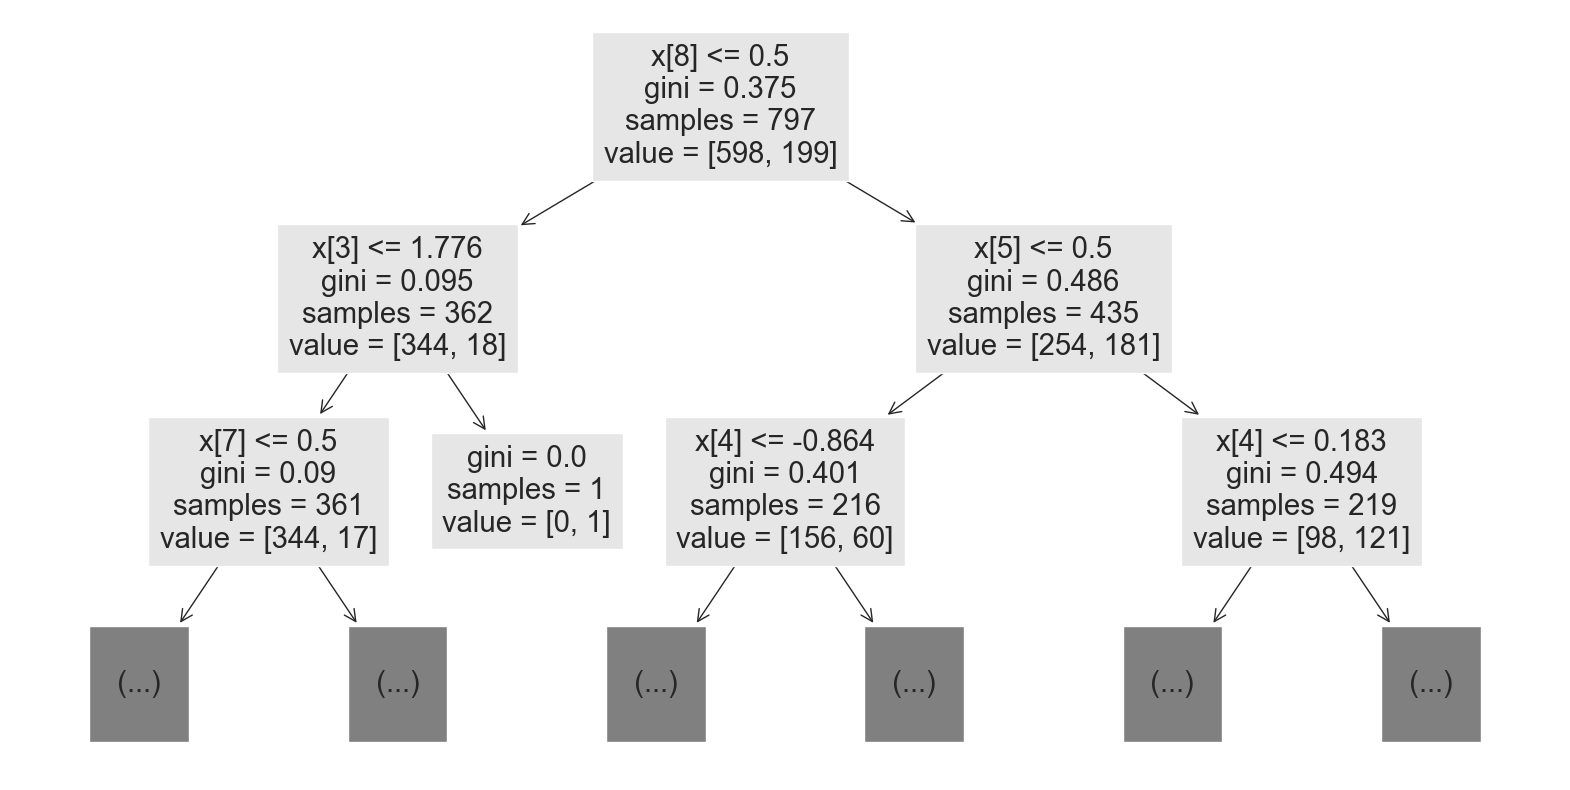

In [30]:
# A small visualization of the Decision Tree

from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(dt,max_depth=2);

This gives us a small insight on how the Decision Tree works. The first level uses the variable X[9], which is 'DuesFrequency_Month-to-month', and splits the data according to the binarity of that variable. The second level uses 'Connectivity_Fiber optic' and 'FeatureF_No'. Etc...

### E.4 -  Random Forest Model
Time to employ a RFM to see if we can achieve accurate results. Ideally, we will prodce a better score than the last few sections.

In [31]:
# Initialize empty lists to store training and validation accuracies
rf_train_acc = []
rf_valid_acc = []

# Iterate over each max_depth value in the defined range
for d in depth_range:
    # Initialize Random Forest classifier with current max_depth value
    temp_forest = RandomForestClassifier(n_estimators=1000, max_depth=d, random_state=1)
    
    # Fit the model to the training data
    temp_forest.fit(X_train, y_train)
    
    # Compute and store the training accuracy
    rf_train_acc.append(temp_forest.score(X_train, y_train))
    
    # Compute and store the validation accuracy
    rf_valid_acc.append(temp_forest.score(X_valid, y_valid))

# Find the index of the maximum validation accuracy
rf_idx = np.argmax(rf_valid_acc)

# Determine the optimal max_depth based on the maximum validation accuracy
rf_opt_depth = depth_range[rf_idx]

# Get the training accuracy for the optimal model
rf_opt_train_acc = rf_train_acc[rf_idx]

# Get the validation accuracy for the optimal model
rf_opt_valid_acc = rf_valid_acc[rf_idx]

# Print the results
print(f'Optimal value for max_depth:           {rf_opt_depth}')
print(f'Training Accuracy for Optimal Model:   {rf_opt_train_acc.round(4)}')
print(f'Validation Accuracy for Optimal Model: {rf_opt_valid_acc.round(4)}')

Optimal value for max_depth:           11
Training Accuracy for Optimal Model:   0.9824
Validation Accuracy for Optimal Model: 0.81


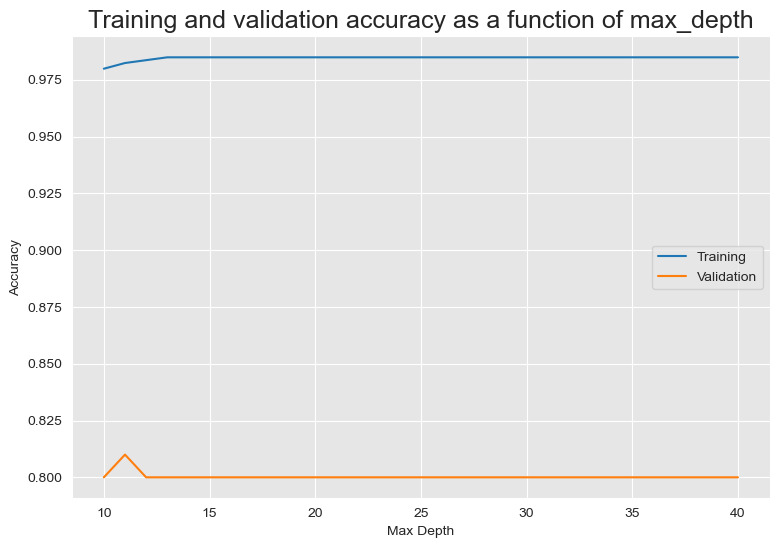

In [32]:
# Plotting training and validation accuracy as a function of max_depth

plt.figure(figsize=([9,6]))
plt.title("Training and validation accuracy as a function of max_depth",fontsize=18)
plt.plot(depth_range, rf_train_acc, label='Training')
plt.plot(depth_range, rf_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
# Initialize Random Forest classifier with the optimal parameters
rfm0 = RandomForestClassifier(n_estimators=100, max_depth=11, random_state=1)

# Fit the Random Forest model to the training data
rfm = rfm0.fit(X_train, y_train)

# Print the training accuracy of the final model
print(f'Training Accuracy for Final Model:   {rfm0.score(X_train, y_train).round(4)}')

# Print the validation accuracy of the final model
print(f'Validation Accuracy for Final Model: {rfm0.score(X_valid, y_valid).round(4)}')

# Print the testing accuracy of the final model
print(f'Testing Accuracy for Final Model:    {rfm0.score(X_test, y_test).round(4)}')

Training Accuracy for Final Model:   0.9824
Validation Accuracy for Final Model: 0.81
Testing Accuracy for Final Model:    0.85


The most effective model in terms of both training convergence and testing accuracy is the Random Forest. Below is the classification report summarizing its output.

In [34]:
from sklearn.metrics import classification_report

# Generate predictions using the Random Forest model on the selected features
predictions = rfm.predict(X.iloc[:, best_features])

# Generate a classification report comparing the predictions to the actual target values
print(classification_report(predictions, y))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       765
           1       0.87      0.93      0.90       232

    accuracy                           0.95       997
   macro avg       0.93      0.94      0.93       997
weighted avg       0.95      0.95      0.95       997



## Questions 

#### Comparing your results, to that of a blind guess, explain why you think the results differed?

A blind guess is something a person can make based on intuition, previous experiences, or simply liking one outcome more than another. In contrast, the results found in this project are calculated guesses. These guesses involve analyzing a large pool of data, identifying trends within the data, and then making predictions based on those findings. Achieving accuracy is the true challenge. While a blind guess requires no effort or resources, a machine learning model demands resources to develop and deploy correctly. Ultimately, this task poses a significant challenge for someone in my position.

#### Describe how you would improve your project if you had more time?

If I had more time to work on this project, I would want to explore the data more thoroughly (data-augmentation), employ more cross-validation techniques/strategies, and tinker with features and models. I would love to find an ML expert, send them this model, and learn better methods, alternative approaches, and how to increase the accuracy of the model. It would be awesome to have someone who is an expert and can easily explain the whys behind the entire process. This class has been excellent but has been challenging, being only 8 weeks, and not my full-time focus.